In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn import preprocessing

In [4]:
X = df.drop(['price'], axis = 1)

In [5]:
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [6]:
y = df.price

In [7]:
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [8]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(y.values.reshape(y.shape[0], 1))

X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [11]:
def predict(area, bedroom, w, b):
    x_scaled = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*x_scaled[0] + w[1]*x_scaled[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [12]:
import random

In [120]:
def mini_batch_gradient(X, y_true, epochs, batch = 5, learning_rate = 0.01):
    no_of_features = X.shape[1]
    w= np.ones(shape=(no_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        rand_ind = np.random.permutation(total_samples)
        x_temp = X[rand_ind]
        y_temp = y_true[rand_ind]
        for j in range(0, total_samples, batch):
            sample_x = x_temp[j:j+batch]
            sample_y = y_temp[j:j+batch]

            y_predicted = np.dot(w, sample_x.T) + b

            w_grad = -(2/len(sample_x))*(sample_x.T.dot(sample_y - y_predicted))
            b_grad = -(2/len(sample_y))*np.sum(sample_y - y_predicted)

            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad

            cost = np.mean(np.square(sample_y - y_predicted))

            if i%10 == 0:
                cost_list.append(cost)
                epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [121]:
w_m, b_m, cost_m, cost_list_m, epoch_list_m = mini_batch_gradient(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 120)
w_m, b_m, cost_m

(array([0.7101162 , 0.67814944]), -0.23329726319143232, 0.004013706661311147)

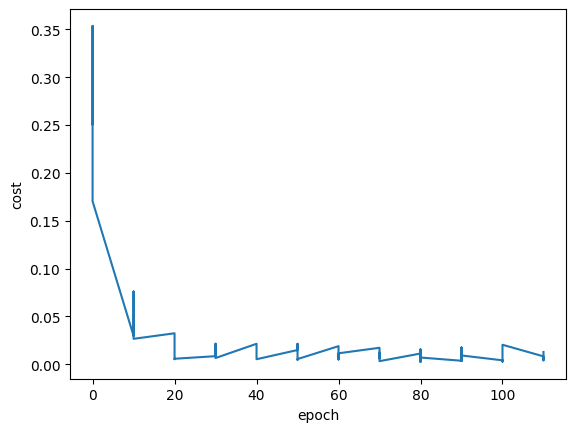

In [122]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_m, cost_list_m)

In [112]:
predict(2600, 4, w_m, b_m)

C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.63284485576864

In [113]:
predict(1500, 3, w_m, b_m)

C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.39224520089445